## Seasonal Statistics With Box Plots

Let's compute some statistics for our datasets using box plots. Let's begin by loading the data, then sorting it by month.

In [ ]:
import xarray as xarr

# load data
data = xarr.open_dataset("./data/clipped_hourly_single_1988.nc")
data["t_celsius"] = data['t2m'] - 273.15

# get data for each season by indexing with month
winter = data['t_celsius'].where(data['valid_time'].dt.month.isin([12,1,2]), drop=True)
spring = data['t_celsius'].where(data['valid_time'].dt.month.isin([3,4,5]), drop=True)
summer = data['t_celsius'].where(data['valid_time'].dt.month.isin([6,7,8]), drop=True)
fall = data['t_celsius'].where(data['valid_time'].dt.month.isin([9,10,11]), drop=True)


Additionally, we must remove NaN values (causes unexpected dimension issues).

In [2]:
# remove NaN values
winter_vals = winter.values[~(winter.isnull().values)]
spring_vals = spring.values[~(spring.isnull().values)]
summer_vals = summer.values[~(summer.isnull().values)]
fall_vals = fall.values[~(fall.isnull().values)]

Let's now generate the box plot.

C:\Users\hudso\AppData\Local\Temp\ipykernel_13584\774117967.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_plot = plot.boxplot([winter_vals, spring_vals, summer_vals, fall_vals], labels=["Winter", "Spring", "Summer", "Fall"])


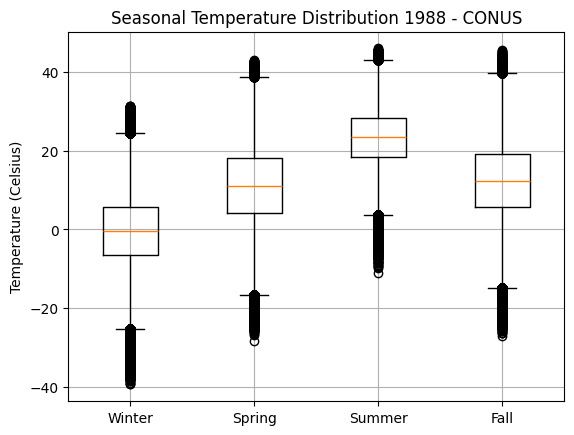

In [3]:
import matplotlib.pyplot as plot

box_plot = plot.boxplot([winter_vals, spring_vals, summer_vals, fall_vals], labels=["Winter", "Spring", "Summer", "Fall"])
plot.ylabel("Temperature (Celsius)")
plot.title("Seasonal Temperature Distribution 1988 - CONUS")
plot.grid(True)
plot.savefig("./plots/Seasonal_Statistics_Hourly_Single_1988.png")
plot.show()